In [6]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

#something
from sklearn import preprocessing

# To impute missing values
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

# To build a Random forest classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [7]:
df_load = pd.read_csv("BankChurners.csv");

In [8]:
# Make a copy so we have the unmodified original dataframe available
df = df_load.copy()

In [9]:
# Print some basic information about the dataset
df.shape

(10127, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [11]:
df.head(50)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
5   713061558  Existing Customer            44      M                2   
6   810347208  Existing Customer            51      M                4   
7   818906208  Existing Customer            32      M                0   
8   710930508  Existing Customer            37      M                3   
9   719661558  Existing Customer            48      M                2   
10  708790833  Existing Customer            42      M                5   
11  710821833  Existing Customer            65      M                1   
12  710599683  Existing Customer            56      M                1   
13  816082233  Existing Customer            35      M                3   
14  712396908  Existing Customer            57      F                2   
15  714885258  Existing Customer            44      M                4   
16  709967358  Existing Customer            48      M                4   
17  753327333  Existing Customer            41      M                3   
18  806160108  Existing Customer            61      M                1   
19  709327383  Existing Customer            45      F                2   
20  806165208  Existing Customer            47      M                1   
21  708508758  Attrited Customer            62      F                0   
22  784725333  Existing Customer            41      M                3   
23  811604133  Existing Customer            47      F                4   
24  789124683  Existing Customer            54      M                2   
25  771071958  Existing Customer            41      F                3   
26  720466383  Existing Customer            59      M                1   
27  804424383  Existing Customer            63      M                1   
28  718813833  Existing Customer            44      F                3   
29  806624208  Existing Customer            47      M                4   
30  778348233  Existing Customer            53      M                3   
31  712991808  Existing Customer            53      M                2   
32  709029408  Existing Customer            41      M                4   
33  788658483  Existing Customer            53      F                2   
34  787937058  Existing Customer            58      M                0   
35  715318008  Existing Customer            55      F                1   
36  713962233  Existing Customer            55      F                3   
37  785432733  Existing Customer            42      F                4   
38  715190283  Existing Customer            57      F                1   
39  708300483  Attrited Customer            66      F                0   
40  827111283  Existing Customer            45      M                3   
41  758551608  Existing Customer            51      M                2   
42  773146383  Existing Customer            50      F                1   
43  778493808  Existing Customer            49      M                3   
44  720572508  Existing Customer            38      F                4   
45  712661433  Existing Customer            49      M                4   
46  789172683  Existing Customer            56      M                2   
47  738406533  Existing Customer            59      M                1   
48  799723908  Existing Customer            46      M                3   
49  771490833  Existing Customer            52      M                1   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Ma

In [12]:
df.isna().sum()


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [13]:
df["Attrition_Flag"].value_counts(1)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

In [14]:
df = df.drop(["CLIENTNUM"], axis=1)
df = df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"], axis=1)
df = df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1)

In [15]:
df.head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   
5  Existing Customer            44      M                2        Graduate   
6  Existing Customer            51      M                4         Unknown   
7  Existing Customer            32      M                0     High School   
8  Existing Customer            37      M                3      Uneducated   
9  Existing Customer            48      M                2        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   
5        Married     $40K - $60K          Blue              36   
6        Married         $120K +          Gold              46   
7        Unknown     $60K - $80K        Silver              27   
8         Single     $60K - $80K          Blue              36   
9         Single    $80K - $120K          Blue              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   
5                         3                       1                      2   
6                         6                       1                      3   
7                         2                       2                      2   
8                         5                       2                      0   
9                         6                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   
6       34516.0                 2264          32252.0                 1.975   
7       29081.0                 1396          27685.0                 2.204   
8       22352.0                 2517          19835.0                 3.355   
9       11656.0                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36         

In [16]:
df["Attrition_Flag"].replace({'Existing Customer' : 0, 'Attrited Customer' : 1}, inplace=True)

In [17]:
df["Attrition_Flag"].value_counts(1)

Attrition_Flag
0    0.83934
1    0.16066
Name: proportion, dtype: float64

In [18]:
df["Gender"].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [19]:
df["Education_Level"].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [20]:
df["Marital_Status"].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [21]:
df["Income_Category"].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [22]:
df.loc[df["Income_Category"] == 'Unknown'].head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
19                0            45      F                2        Graduate   
28                0            44      F                3      Uneducated   
39                1            66      F                0       Doctorate   
44                0            38      F                4        Graduate   
58                0            44      F                5        Graduate   
83                0            59      F                1        Graduate   
94                0            45      F                3         Unknown   
100               0            49      F                3         College   
101               0            41      F                3         Unknown   
138               0            63      F                1         College   

    Marital_Status Income_Category Card_Category  Months_on_book  \
19         Married         Unknown          Blue              37   
28          Single         Unknown          Blue              34   
39         Married         Unknown          Blue              56   
44          Single         Unknown          Blue              28   
58         Married         Unknown          Blue              35   
83         Married         Unknown          Blue              52   
94         Married         Unknown          Blue              28   
100         Single         Unknown          Blue              43   
101        Married         Unknown        Silver              34   
138        Married         Unknown          Blue              36   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
19                          6                       1                      2   
28                          5                       2                      2   
39                          5                       4                      3   
44                          2                       3                      3   
58                          4                       1                      2   
83                          2                       3                      3   
94                          5                       1                      2   
100                         4                       4                      0   
101                         5                       3                      3   
138                         6                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
19        14470.0                 1157          13313.0                 0.966   
28        10100.0                    0          10100.0                 0.525   
39         7882.0                  605           7277.0                 1.052   
44         9830.0                 2055           7775.0                 0.977   
58         6273.0                  978           5295.0                 2.275   
83        10133.0                 1417           8716.0                 0.383   
94         2535.0                 2440             95.0                 1.705   
100       23032.0                 1960          21072.0                 0.619   
101       34516.0                 2053          32463.0                 1.034   
138        3967.0                 1568           2399.0                 1.236   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
19              1207              21                0.909   
28              1052              18                1.571   
39               704              16                0.143   
44              1042              23                0.917   
58              1359              25                1.083   
83              1068              20                0.818   
94              1312              20                1.222   
100             1289              22                1.000   
101             1487              26                0.733   
138             1657     

In [23]:
df["Income_Category"].replace({'Unknown' : np.NaN}, inplace=True)

In [24]:
df["Education_Level"].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [25]:
df["Education_Level"].replace({'Unknown' : np.NaN}, inplace=True)

In [26]:
df["Marital_Status"].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [27]:
df["Marital_Status"].replace({'Unknown' : np.NaN}, inplace=True)

In [28]:
df["Income_Category"].replace({'Less than $40K' : 0, '$40K - $60K' : 1, '$60K - $80K' : 2, '$80K - $120K' : 3, '$120K +' : 4}, inplace=True)

In [29]:
df["Income_Category"].value_counts()

Income_Category
0.0    3561
1.0    1790
3.0    1535
2.0    1402
4.0     727
Name: count, dtype: int64

In [30]:
df["Card_Category"].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [31]:
categoryColumns = ["Gender", "Education_Level","Marital_Status", "Income_Category", "Card_Category"]

for column in categoryColumns:
    df[column]=df[column].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [32]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  #

In [33]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [34]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

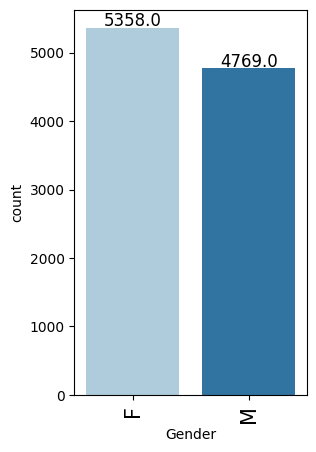

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


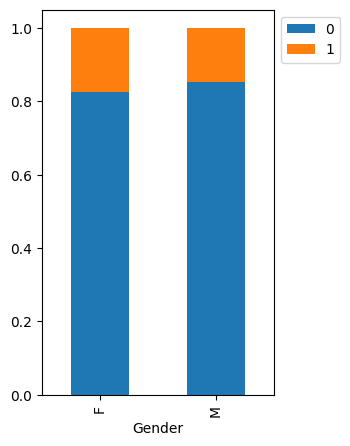

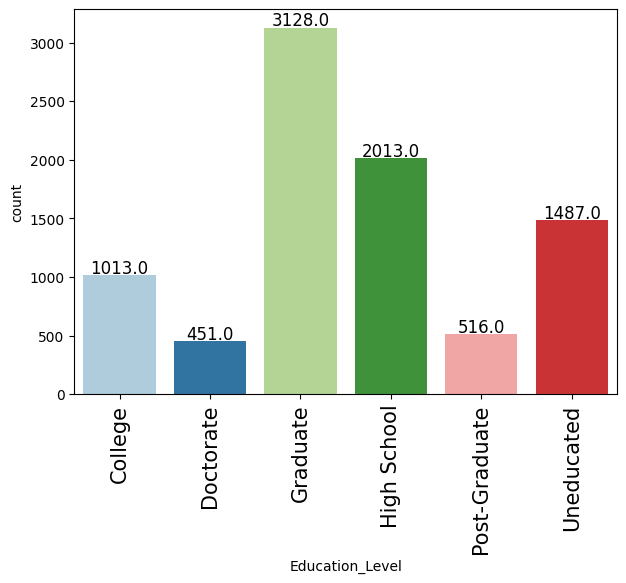

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


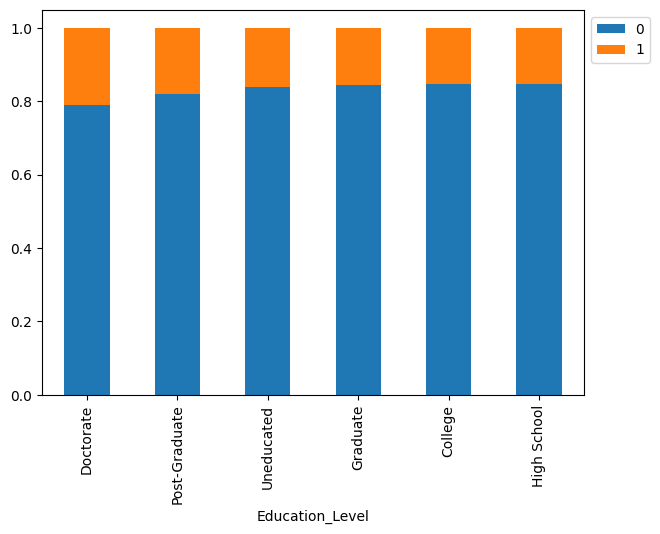

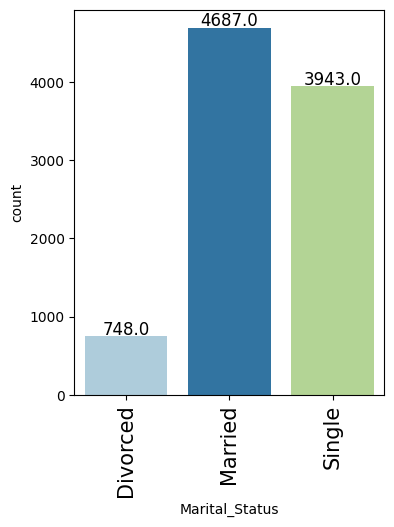

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


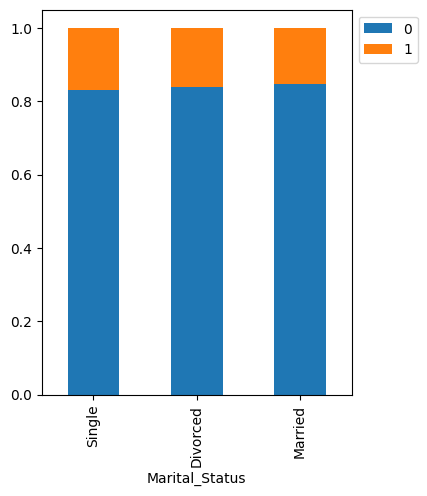

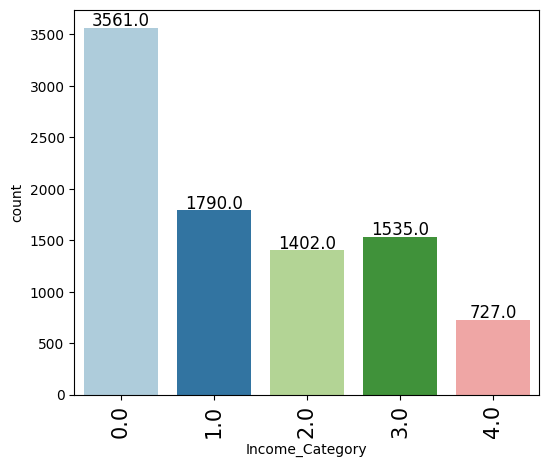

Attrition_Flag      0     1   All
Income_Category                  
All              7575  1440  9015
0.0              2949   612  3561
1.0              1519   271  1790
3.0              1293   242  1535
2.0              1213   189  1402
4.0               601   126   727
------------------------------------------------------------------------------------------------------------------------


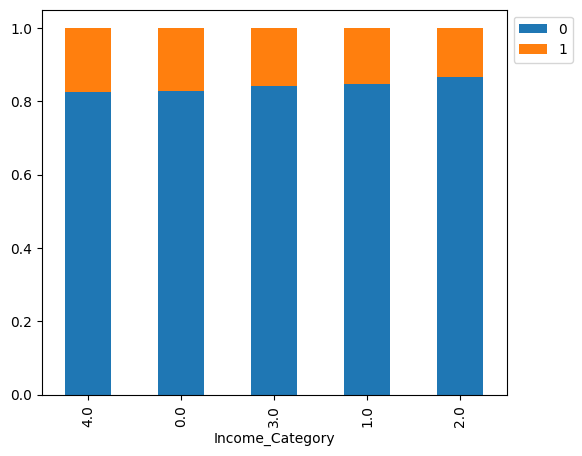

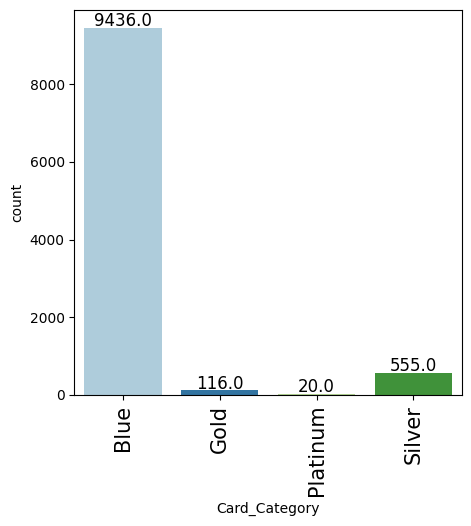

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


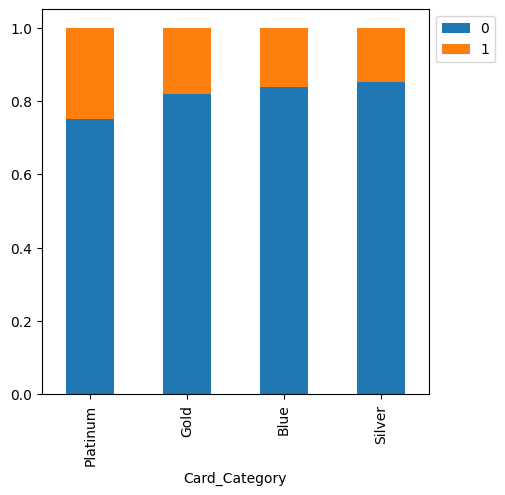

In [35]:
for column in categoryColumns:
    labeled_barplot(df, column)
    stacked_barplot(df, column, "Attrition_Flag" )

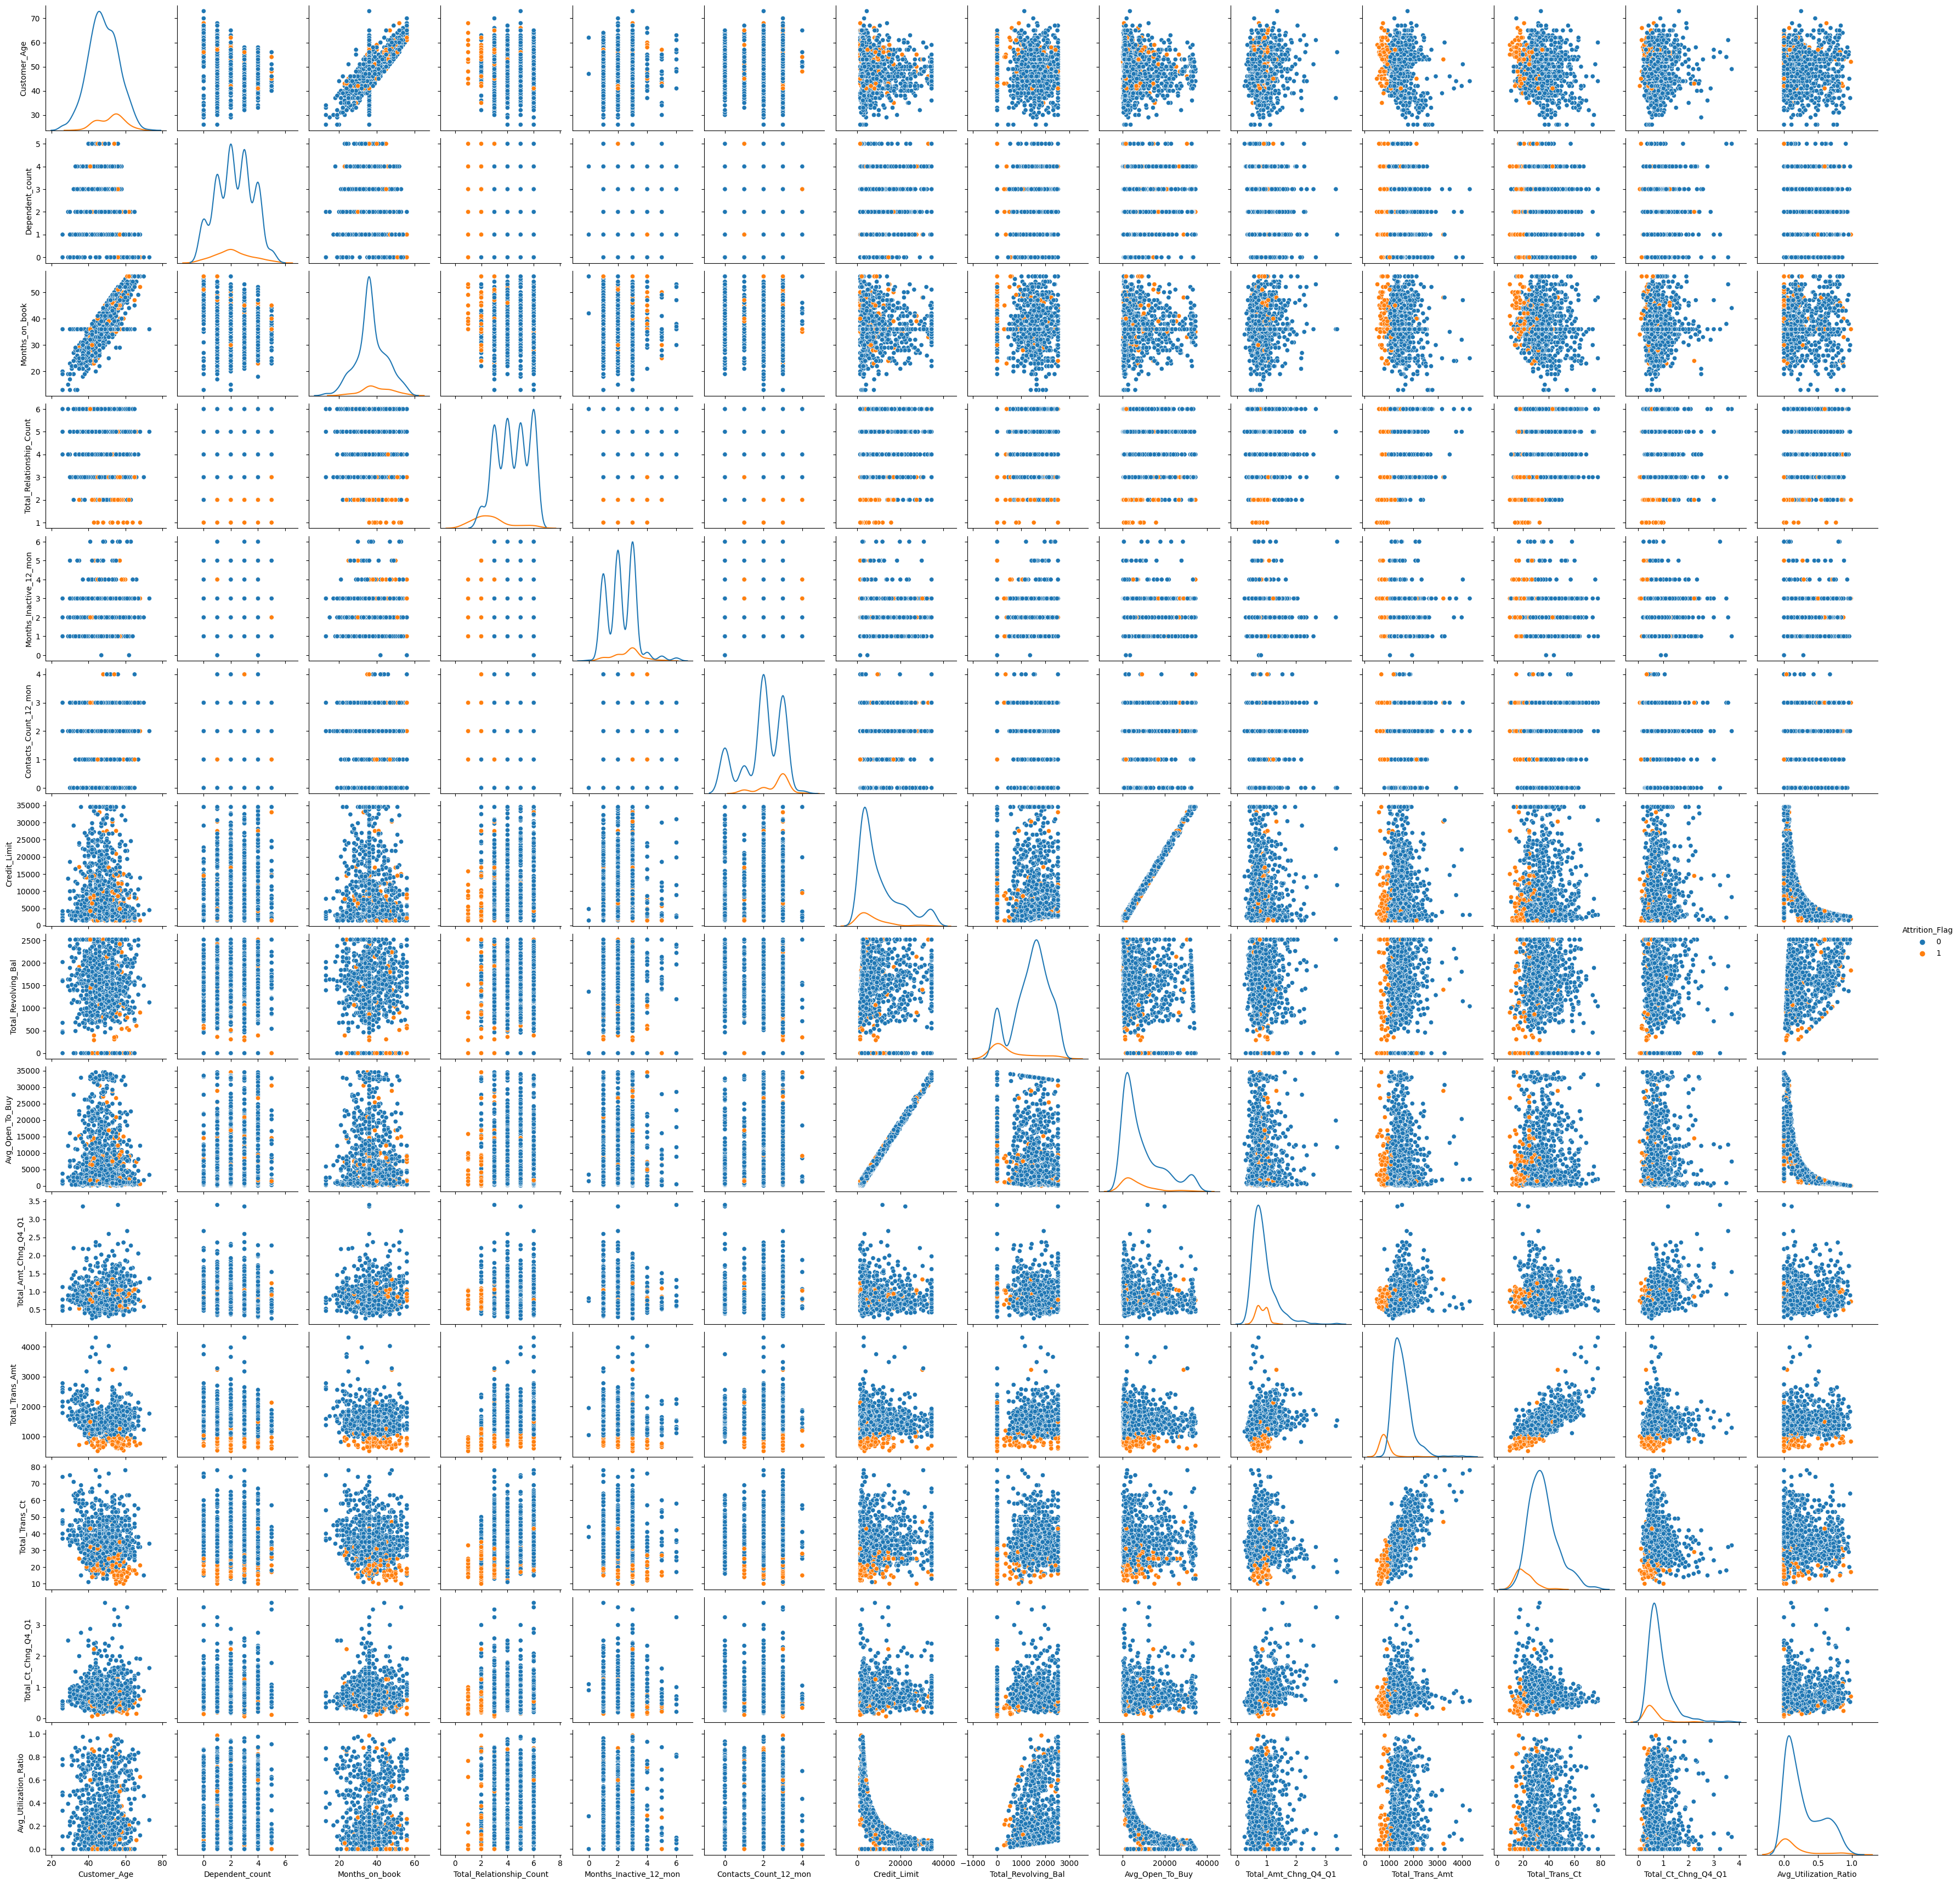

In [36]:
sns.pairplot(df[0 : 1000] , hue="Attrition_Flag" , diag_kind = "kde", diag_kws=dict(fill=False))
plt.show()

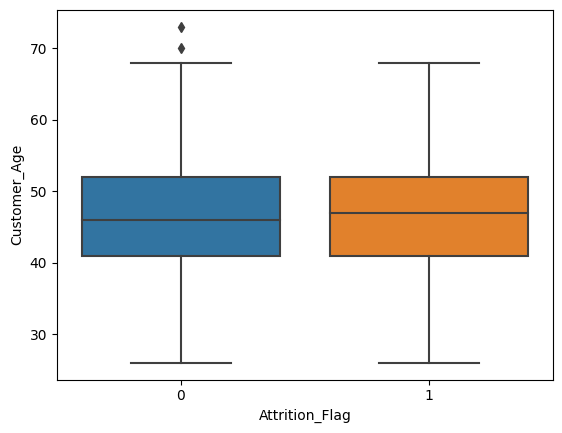

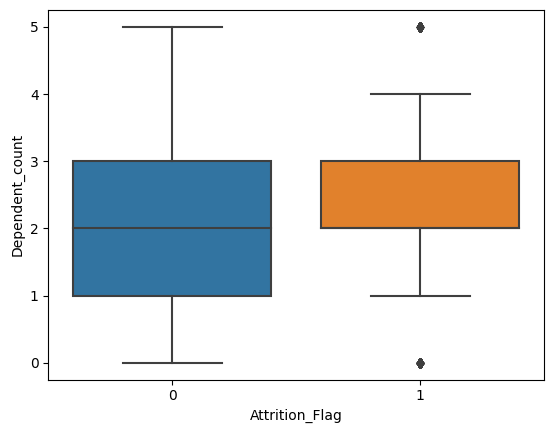

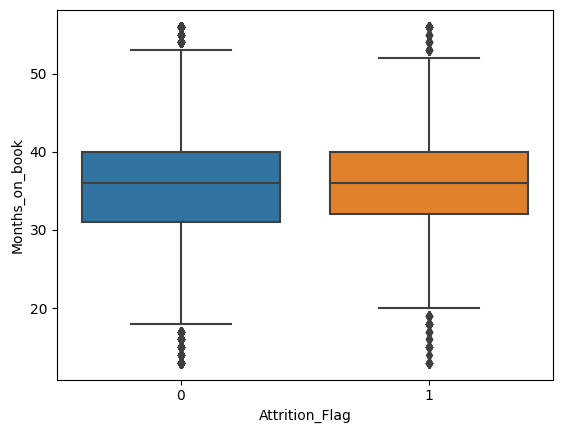

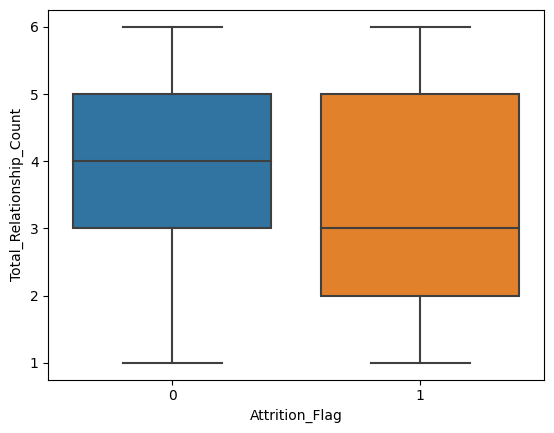

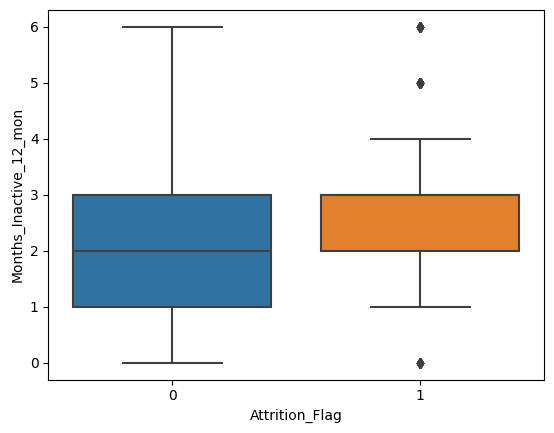

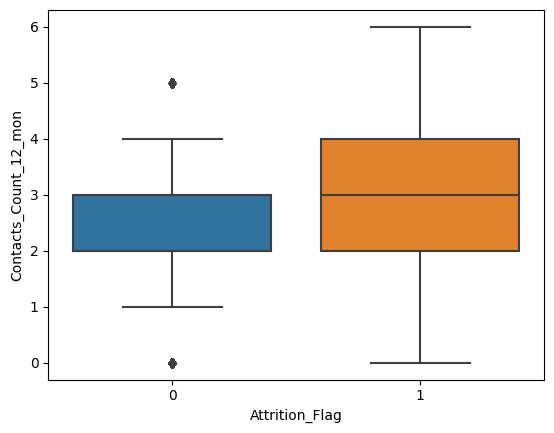

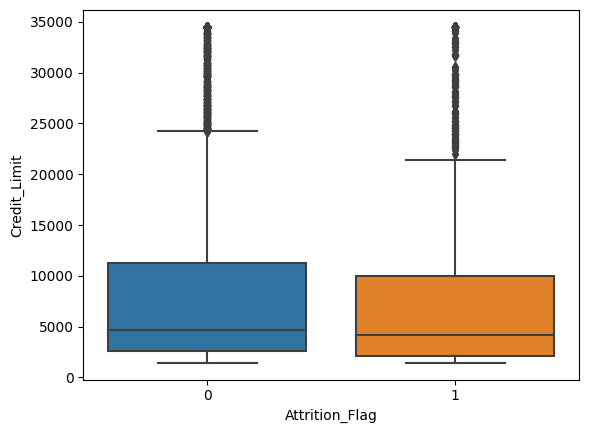

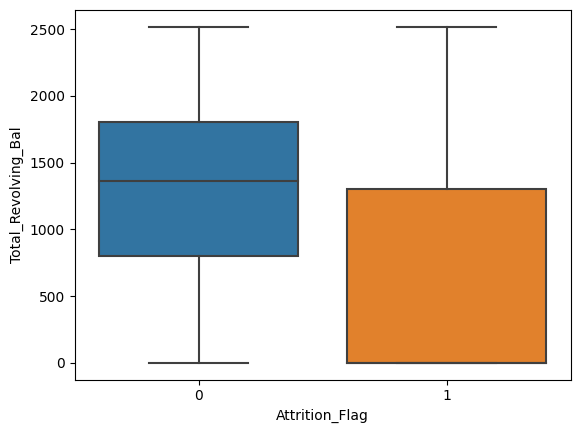

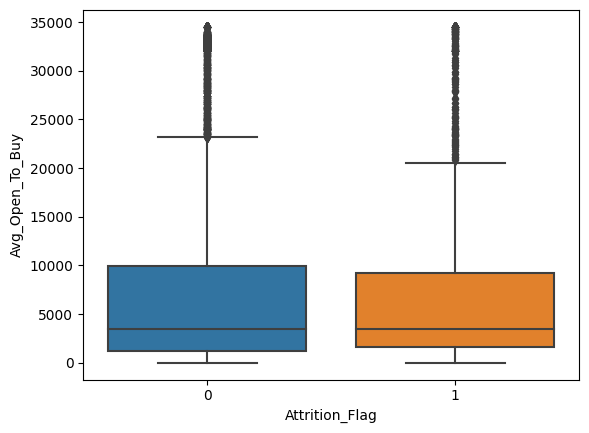

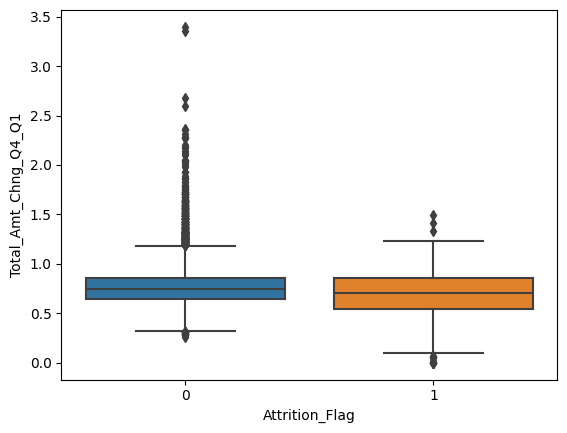

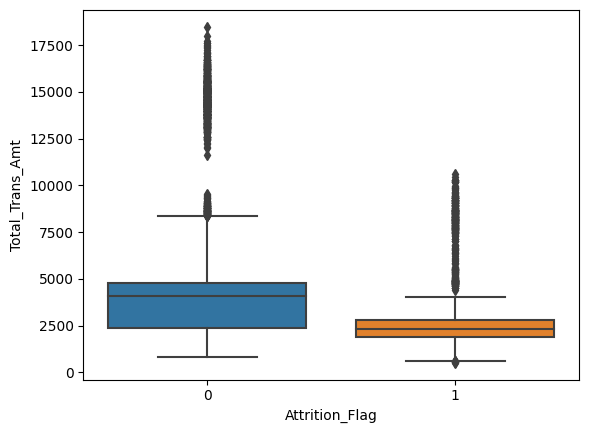

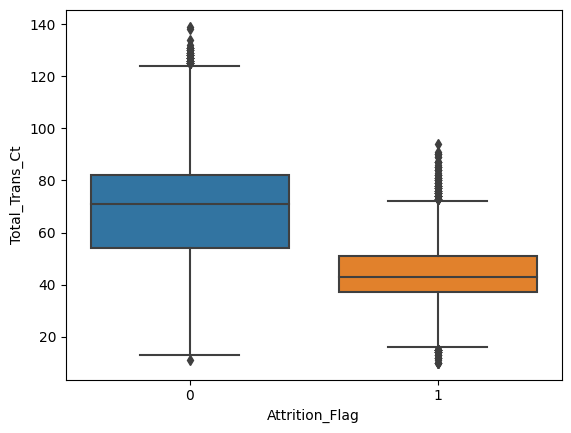

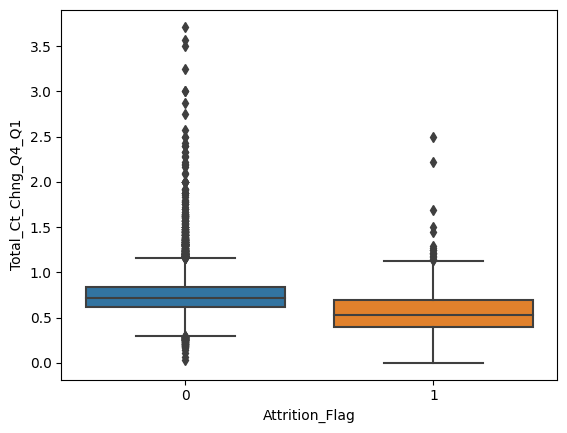

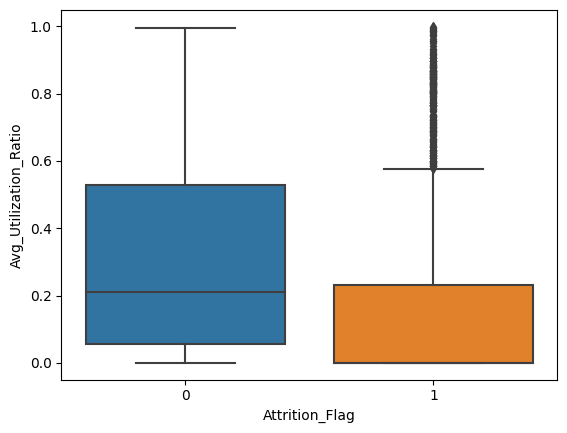

In [37]:
for i in ["Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt","Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio" ]:
    sns.boxplot(df, x= "Attrition_Flag", y= i)
    plt.show()

In [38]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"] 


In [39]:
X = X.fillna(X.mode().iloc[0])
X = pd.get_dummies(X, columns = ["Income_Category","Education_Level","Marital_Status", "Card_Category"], dtype= int)
X = pd.get_dummies(X, columns = ["Gender"], drop_first=True, dtype= int)

X.head(10)


Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   
5            44                2              36                         3   
6            51                4              46                         6   
7            32                0              27                         2   
8            37                3              36                         5   
9            48                2              36                         6   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   
6                       1                      3       34516.0   
7                       2                      2       29081.0   
8                       2                      0       22352.0   
9                       3                      3       11656.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  ...   
1                  864           7392.0                 1.541  ...   
2                    0           3418.0                 2.594  ...   
3                 2517            796.0                 1.405  ...   
4                    0           4716.0                 2.175  ...   
5                 1247           2763.0                 1.376  ...   
6                 2264          32252.0                 1.975  ...   
7                 1396          27685.0                 2.204  ...   
8                 2517          19835.0                 3.355  ...   
9                 1677           9979.0                 1.524  ...   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   
5                              0                           0   
6                              0                           0   
7                              0                           0   
8                              0                           1   
9                              0                           0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       1                      0   
1                        0                       0                      1   
2                        0                       1                      0   
3                        0                       1                      0   
4                        0                       1                      0   
5                        0                       1                      0   
6                        0                       1                      0   
7                        0                       1                      0   
8                        0                       0                      1   
9                        0                       0                      1   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1   

In [40]:

# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)
"""
# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
"""
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.info()

(8101, 33) (2026, 33) (8101,) (2026,)
<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 3105 to 4752
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   8101 non-null   int64  
 1   Dependent_count                8101 non-null   int64  
 2   Months_on_book                 8101 non-null   int64  
 3   Total_Relationship_Count       8101 non-null   int64  
 4   Months_Inactive_12_mon         8101 non-null   int64  
 5   Contacts_Count_12_mon          8101 non-null   int64  
 6   Credit_Limit                   8101 non-null   float64
 7   Total_Revolving_Bal            8101 non-null   int64  
 8   Avg_Open_To_Buy                8101 non-null   float64
 9   Total_Amt_Chng_Q4_Q1           8101 non-null   float64
 10  Total_Trans_Amt                8101 non-null   int64  
 11  Total_Trans_Ct                 8101 non-null   int64  
 12  Total_Ct_Chn

In [41]:
X_train.isna().sum()

Customer_Age                     0
Dependent_count                  0
Months_on_book                   0
Total_Relationship_Count         0
Months_Inactive_12_mon           0
Contacts_Count_12_mon            0
Credit_Limit                     0
Total_Revolving_Bal              0
Avg_Open_To_Buy                  0
Total_Amt_Chng_Q4_Q1             0
Total_Trans_Amt                  0
Total_Trans_Ct                   0
Total_Ct_Chng_Q4_Q1              0
Avg_Utilization_Ratio            0
Income_Category_0.0              0
Income_Category_1.0              0
Income_Category_2.0              0
Income_Category_3.0              0
Income_Category_4.0              0
Education_Level_College          0
Education_Level_Doctorate        0
Education_Level_Graduate         0
Education_Level_High School      0
Education_Level_Post-Graduate    0
Education_Level_Uneducated       0
Marital_Status_Divorced          0
Marital_Status_Married           0
Marital_Status_Single            0
Card_Category_Blue  

In [42]:
"""
X_train = X_train.fillna(X_train.mode().iloc[0])
X_train["Income_Category"] = X_train["Income_Category"].astype(np.int64)

X_val = X_val.fillna(X_val.mode().iloc[0])
X_val["Income_Category"] = X_val["Income_Category"].astype(np.int64)

X_test = X_test.fillna(X_test.mode().iloc[0])
X_test["Income_Category"] = X_test["Income_Category"].astype(np.int64)
"""

'\nX_train = X_train.fillna(X_train.mode().iloc[0])\nX_train["Income_Category"] = X_train["Income_Category"].astype(np.int64)\n\nX_val = X_val.fillna(X_val.mode().iloc[0])\nX_val["Income_Category"] = X_val["Income_Category"].astype(np.int64)\n\nX_test = X_test.fillna(X_test.mode().iloc[0])\nX_test["Income_Category"] = X_test["Income_Category"].astype(np.int64)\n'

In [43]:
"""
# Encode categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train.head(10)
"""

'\n# Encode categorical columns\nX_train = pd.get_dummies(X_train, drop_first=True)\nX_val = pd.get_dummies(X_val, drop_first=True)\nX_test = pd.get_dummies(X_test, drop_first=True)\n\nX_train.head(10)\n'

In [44]:

# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(target, pred):
    """
    Function to compute different metrics to check classification model performance

    pred: predicted variable
    target: dependent variable
    """

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [45]:
def confusion_matrix_sklearn(target, pred):
    """
    To plot the confusion_matrix with percentages

    pred: predicted variable
    target: dependent variable
    """
    cm = confusion_matrix(target, pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [60]:
def model_fit_predict(model):
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    # Train the model
    model.fit(X_train, y_train)
    # Predicting the target for train and validation set
    pred_train = model.predict(X_train)
    print("Training performance:\n", model_performance_classification_sklearn(y_train, pred_train))
    confusion_matrix_sklearn(y_train, pred_train)
    pred_test = model.predict(X_test)
    print("Testing performance:\n", model_performance_classification_sklearn(y_test, pred_test))
    confusion_matrix_sklearn(y_test, pred_test)


NON SAMPLED

(8101, 33) (2026, 33) (8101,) (2026,)
Training performance:
    Accuracy    Recall  Precision        F1
0   0.87841  0.433948   0.694957  0.534279
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.87463  0.430769   0.669856  0.524345


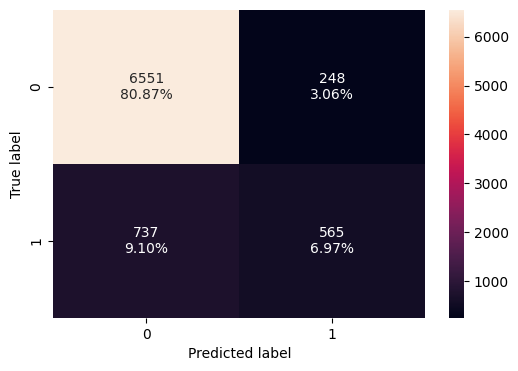

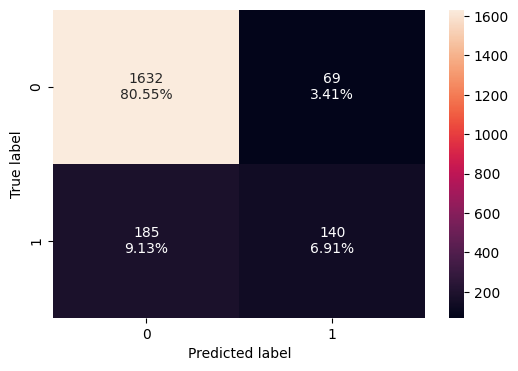

In [61]:
lrn = LogisticRegression(random_state=1)
model_fit_predict(lrn)

Accuaracy is total of TRUES (postives and negatives)    TP +TN / Total    
Recall is the  TP / TP + FN     
Precision is  TP / TP + FP      

In [48]:
df.head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   
5               0            44      M                2        Graduate   
6               0            51      M                4             NaN   
7               0            32      M                0     High School   
8               0            37      M                3      Uneducated   
9               0            48      M                2        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married             2.0          Blue              39   
1         Single             0.0          Blue              44   
2        Married             3.0          Blue              36   
3            NaN             0.0          Blue              34   
4        Married             2.0          Blue              21   
5        Married             1.0          Blue              36   
6        Married             4.0          Gold              46   
7            NaN             2.0        Silver              27   
8         Single             2.0          Blue              36   
9         Single             3.0          Blue              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   
5                         3                       1                      2   
6                         6                       1                      3   
7                         2                       2                      2   
8                         5                       2                      0   
9                         6                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   
6       34516.0                 2264          32252.0                 1.975   
7       29081.0                 1396          27685.0                 2.204   
8       22352.0                 2517          19835.0                 3.355   
9       11656.0                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36                0.714                  

In [49]:
scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


In [50]:
df = scaleColumns(df, ["Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt","Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio" ]) 

In [51]:
df.head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0      0.404255      M              0.6     High School   
1               0      0.489362      F              1.0        Graduate   
2               0      0.531915      M              0.6        Graduate   
3               0      0.297872      F              0.8     High School   
4               0      0.297872      M              0.6      Uneducated   
5               0      0.382979      M              0.4        Graduate   
6               0      0.531915      M              0.8             NaN   
7               0      0.127660      M              0.0     High School   
8               0      0.234043      M              0.6      Uneducated   
9               0      0.468085      M              0.4        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married             2.0          Blue        0.604651   
1         Single             0.0          Blue        0.720930   
2        Married             3.0          Blue        0.534884   
3            NaN             0.0          Blue        0.488372   
4        Married             2.0          Blue        0.186047   
5        Married             1.0          Blue        0.534884   
6        Married             4.0          Gold        0.767442   
7            NaN             2.0        Silver        0.325581   
8         Single             2.0          Blue        0.534884   
9         Single             3.0          Blue        0.534884   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                       0.8                0.166667               0.500000   
1                       1.0                0.166667               0.333333   
2                       0.6                0.166667               0.000000   
3                       0.4                0.666667               0.166667   
4                       0.8                0.166667               0.000000   
5                       0.4                0.166667               0.333333   
6                       1.0                0.166667               0.500000   
7                       0.2                0.333333               0.333333   
8                       0.8                0.333333               0.000000   
9                       1.0                0.500000               0.500000   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      0.340190             0.308701         0.345116              0.392994   
1      0.206112             0.343266         0.214093              0.453636   
2      0.059850             0.000000         0.098948              0.763615   
3      0.056676             1.000000         0.022977              0.413600   
4      0.099091             0.000000         0.136557              0.640271   
5      0.077747             0.495431         0.079970              0.405063   
6      1.000000             0.899484         0.934402              0.581395   
7      0.835690             0.554629         0.802075              0.648808   
8      0.632260             1.000000         0.574624              0.987636   
9      0.308900             0.666269         0.289051              0.448631   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0         0.035273        0.248062             0.437534               0.061061  
1         0.043452        0.178295             1.000000               0.105105  
2         0.076611        0.077519             0.628164               0.000000  
3         0.036775        0.077519             0.628164               0.760761  
4         0.017025        0.139535             0.673129               0.000000  
5         0.032158        0.108527             0.227787               0.311311  
6         0.045621        0.162791             0.194400               0.066066  
7         0.057194        0.201550             0.192246               0.0

(8101, 33) (2026, 33) (8101,) (2026,)
Training performance:
    Accuracy    Recall  Precision        F1
0   0.87841  0.433948   0.694957  0.534279


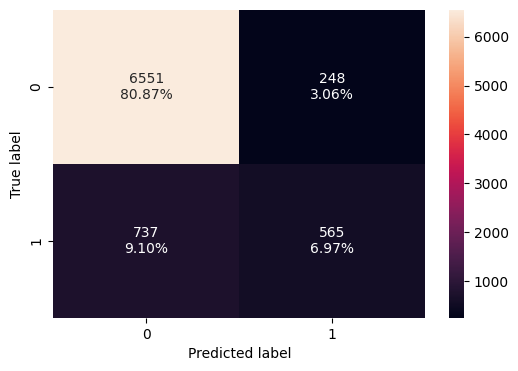

In [59]:
lrn = LogisticRegression(random_state=1)
model_fit_predict(lrn)

In [52]:
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [56]:
y_pred = reg.predict(X_test)

In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.21888639973908633
Mean Squared Error: 0.08333131630604
Root Mean Squared Error: 0.2886716409799203
